# Homework 2: Hypothesis Testing and Simple Linear Regression
***

**Name**: Sasi Jyothirmai Bonu

***

This assignment is due on Gradescope by **Friday February 16 at 5:59PM**. If you submit the assignment  by this deadline, you will receive 5 bonus points. If you need a little extra time, you may submit your work by **Monday February 19 at 5:59PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- There are 2 total questions on this assignment. 
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 



---

---


### Problem 1 - Hypothesis Testing with Randomization (25 points)

For this problem, we will be performing a hypothesis test with randomization. 

The Stanford University Heart Transplant Study was conducted to determine whether an experimental heart transplant program increased lifespan. Each patient entering the program was designated an official heart transplant candidate, meaning that they were gravely ill and would most likely benefit from a new heart. Some patients got a transplant and some did not. The variable `transplant` indicates which group the patients were in; patients in the treatment group got a transplant and those in the control group did not. Of the 34 patients in the control group, 30 died. Of the 69 people in the treatment group, 45 died. Another variable called `survived` was used to indicate whether or not the patient was alive at the end of the study.

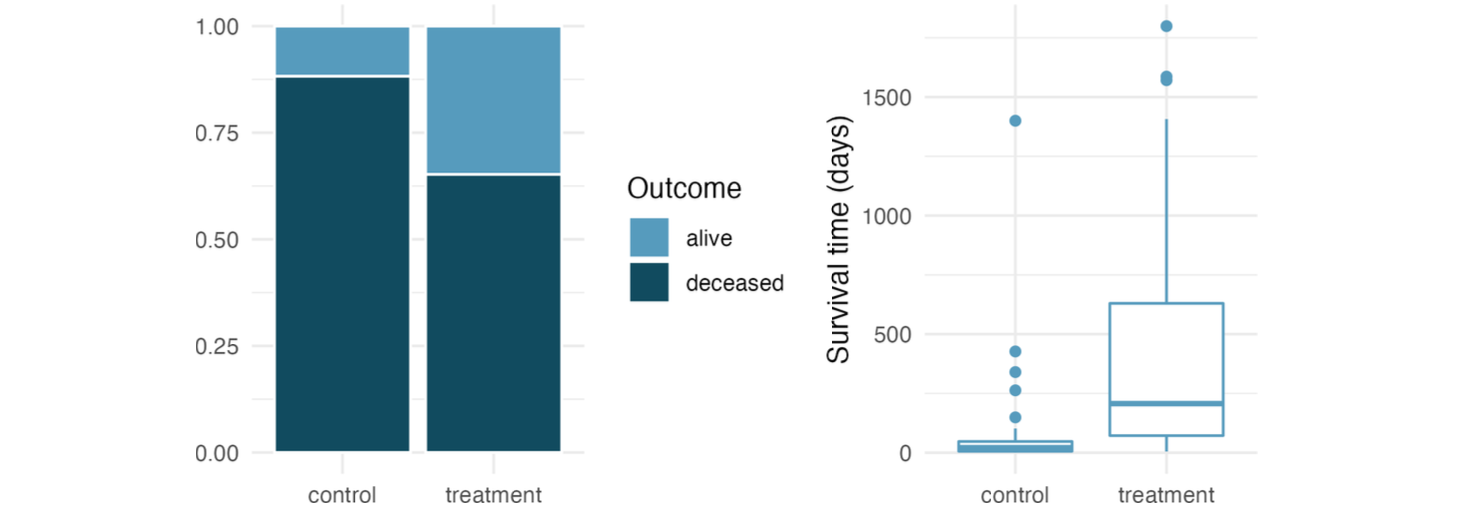

**Part A**: Does the stacked bar plot indicate that survival is independent of whether or not the patient got a transplant? Explain your reasoning?

The stacked bar plot does not show that a patient's survival is independent of receiving a transplant. It was, if anything, the reverse. It demonstrates that while about 65% of recipients of transplants died, close to 90% of recipients of no transplants passed away. Upon visual inspection, we may conclude that there is a notable variation in the surviving segment heights between the two groups, suggesting that transplant status may have an impact on survival. This is rather convincing proof that a patient's chance of dying depends on whether or not they received a transplant. A statistical hypothesis test would have to be run to see if the observed difference is statistically significant, though, before a firm conclusion could be drawn.

**Part B:** What do the box plots above suggest about the efficacy (effectiveness) of the heart transplant treatment?

It can be seen that on average, people who got a transplant lived longer than those who didn't. The treatment group's median line in the box is higher than the control group's, indicating that patients who got heart transplants had a higher median survival time than those who did not. On the survival time axis, the treatment group's IQR is represented by a box that is higher than the IQR of the control group. This suggests that the treatment group's middle 50% of patients outlived the control group's middle 50% in terms of survival. The longest anyone who has lived without a transplant is a bit fewer than 1500 days, whereas the longest anyone who has lived with a transplant is over 1750 days. According to the box plots, patients in the treatment group generally had longer survival times than patients in the control group. This finding may indicate that the heart transplant treatment was successful in extending patient lives. These plots, however, do not statistically demonstrate the effectiveness of the treatment.

**Part C:** What proportion of patients in the treatment group and what proportion of patients in the control group died?

For the treatment group:
Number of patients who died: 45
Total number of patients: 69


For the control group:
Number of patients who died: 30
Total number of patients: 34

The proportion of patients who died in each group can be calculated as:

Proportion of deaths = $$\frac{Number of deaths}{Total number of patients}$$
​
For the treatment group:
​

Proportion of deaths = $\frac{45}{69} = 0.65$

For the control group:

Proportion of deaths = $\frac{30}{34} = 0.88$

**Part D:** Now we will perform a hypothesis test using randomization. State the null and alternative hypotheses for the test.

Null Hypothesis (H0): There is no difference in survival rates between patients who received a heart transplant (treatment group) and those who did not (control group).
Alternative Hypothesis (HA): There is a difference in survival rates between patients who received a heart transplant (treatment group) and those who did not (control group).

**Part E:** Run 1000 simulations for a randomization test and compile the results in a histogram. Display your histogram below. Please see pages 215-216 in "Introduction to Modern Statistics" as a reference for this. Note that this problem is taken directly from the textbook. We are trying to see if we can replicate the results. Due to random sampling, it is expected that your histograms should be slightly different from the textbook and from each other. 

Note, you will need to create synthetic data. There were $34+69 = 103$ Total people in this study. You will need to create a process for labeling the data points as "survivor" or "non-survivor" and making random draws from this labeled data. Hint: You could make a list or a csv file with this data and then sample it randomly. Or you could compute the rate of survivors vs non-survivors within these 103 data values and simulate the data using the survival rate as a probability distribution. Or you could come up with your own process. The first way I described it a bit closer to the classic set up we have been discussing in class. But I think the second way is a reasonable approximation. Either is fine for the sake of this homework assignment. 

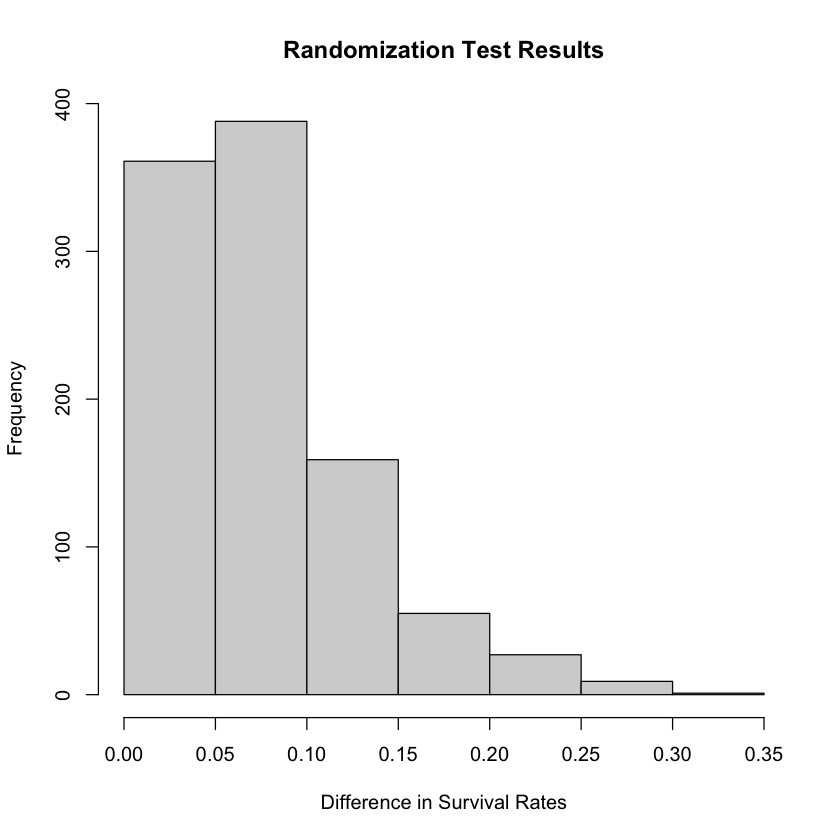

In [19]:
randomization_test <- function() {     # Function to simulate randomization test
  patients <- 34 + 69
  control_survivors <- 34 - 30
  treatment_survivors <- 69 - 45
  
  data <- c(rep("survivor", control_survivors), rep("non-survivor", 30),
            rep("survivor", treatment_survivors), rep("non-survivor", 45)) #combining data
  
  random_data <- sample(data)  #sample to make it random
  
  difference <- abs(mean(random_data[1:34] == "survivor") - mean(random_data[35:103] == "survivor")) #difference in survival rate
  
  return(difference)
}

n_simulations <- 1000
simulation <- replicate(n_simulations, randomization_test())  #run simulations

hist(simulation, breaks = 10, main = "Randomization Test Results", xlab = "Difference in Survival Rates")

There is a skewed distribution to the right in the differences in survival rates. The distribution's tail moves to the right as the disparity in survival rates rises. The greatest frequency is found at the points where survival rate variations are the least, indicating that most random assignments of subjects to two groups produce relatively little variation in survival rates.

**Part F:** What is your conclusion and why? (In other words, will you reject your null hypothesis or fail to reject your null hypothesis?)

Since the difference is on the left tail of the histogram, I'll reject the null hypothesis.

---


### Problem 2 - Simple Linear Regression (25 points)

For this problem, we will be performing simple linear regression using the following dataset:
`Fish.csv`

Information about this data from the original source (kaggle): "This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted."

**Response**:
- Weight (in grams)

**Features**:
- Length1 (vertical length in cm)
- Length2 (diagonal length in cm)
- Length3 (cross length in cm)
- Height (in cm)
- Width (diagonal width in cm)

The species name of the fish is also given. 

**Part A**: Read the data from the csv into a DataFrame.  If you are reading in `Fish.csv`, I would recommend dropping the species column as it is non-numerical.

Also, make sure to re-order the columns so that the response variable is the last column.

In [20]:
fishes <- read.csv('Fish.csv')  #reading the data
head(fishes)

,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bream,242,23.2,25.4,30.0,11.5200,4.0200
2,Bream,290,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363,26.3,29.0,33.5,12.7300,4.4555
5,Bream,430,26.5,29.0,34.0,12.4440,5.1340
6,Bream,450,26.8,29.7,34.7,13.6024,4.9274


In [21]:
fishes <- subset(fishes, select = -Species) #dropping species column
fishes <- fishes[, c(setdiff(names(fishes), "Weight"), "Weight")] #reordering
head(fishes)

,Length1,Length2,Length3,Height,Width,Weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23.2,25.4,30.0,11.5200,4.0200,242
2,24.0,26.3,31.2,12.4800,4.3056,290
3,23.9,26.5,31.1,12.3778,4.6961,340
4,26.3,29.0,33.5,12.7300,4.4555,363
5,26.5,29.0,34.0,12.4440,5.1340,430
6,26.8,29.7,34.7,13.6024,4.9274,450


**Part B:** Make separate scatter plots for each feature versus the response. From these plots, we will try and make inferences about which features appear to have a relationship with the response variable. Write a brief summary of what you notice in each plot. Do you notice any trends in the data?

In [22]:
library(ggplot2)

scatter_plot <- function(col, x_var, y_var) {
  ggplot(col, aes_string(x = x_var, y = y_var)) +
    geom_point() +
    labs(x = x_var, y = y_var) +
    ggtitle(paste("Scatter plot of", y_var, "vs", x_var))
}

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


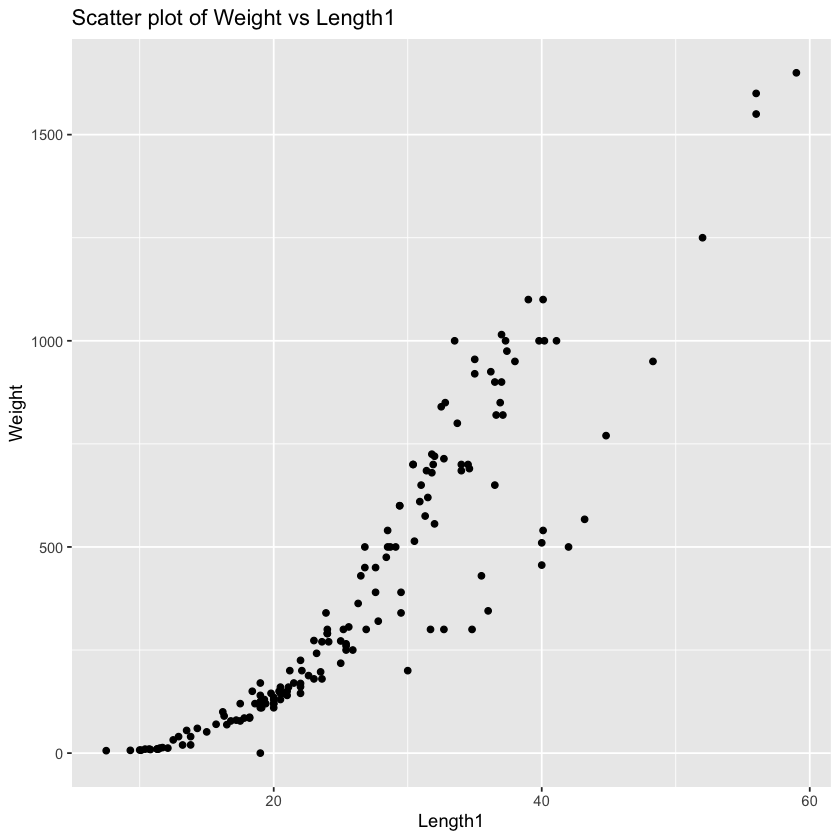

In [23]:
scatter_plot(fishes, names(fishes)[1], "Weight")

There is a positive correlation with weight. As Length1 dimension increases, the weight of the fish tends to increase as well.

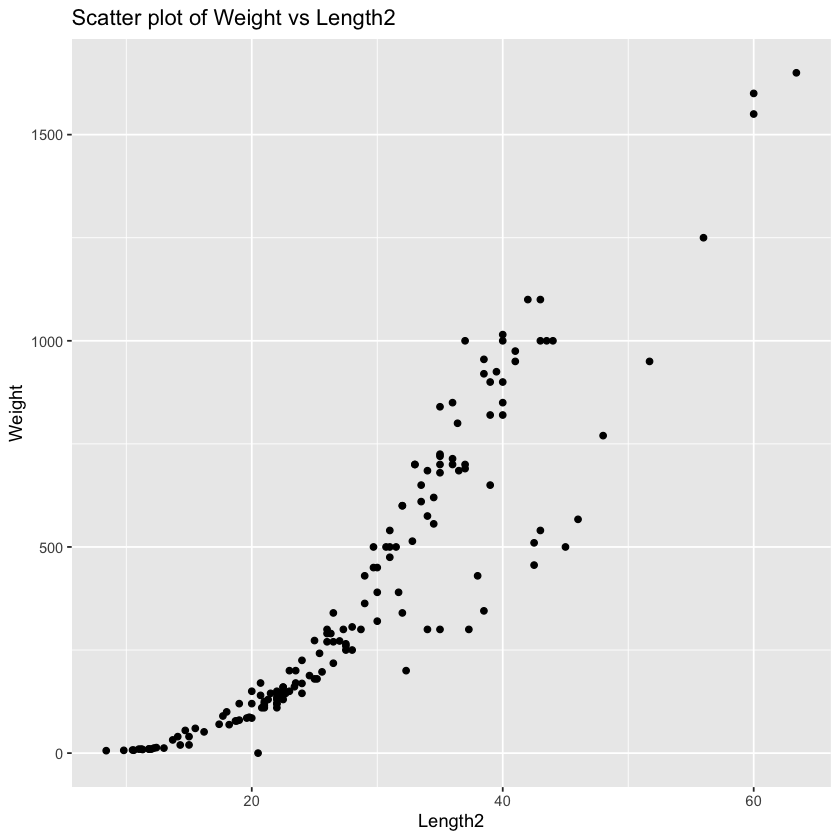

In [24]:
scatter_plot(fishes, names(fishes)[2], "Weight")

Similarly, there is a positive correlation with weight of Length2. As Length2 increases, the weight of the fish increases as well.

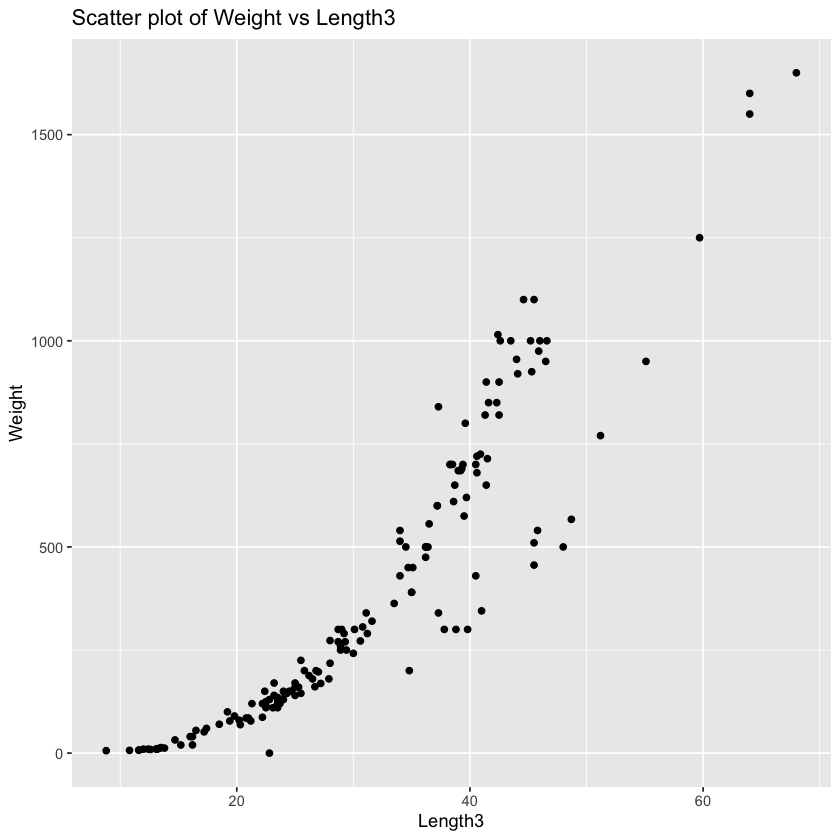

In [25]:
scatter_plot(fishes, names(fishes)[3], "Weight")

Additionally, Length3 and the connection are consistent. This is understandable given that it's the same fish's length. The fish's weight increases in direct proportion to its length, as seen by their significant positive correlation with weight.

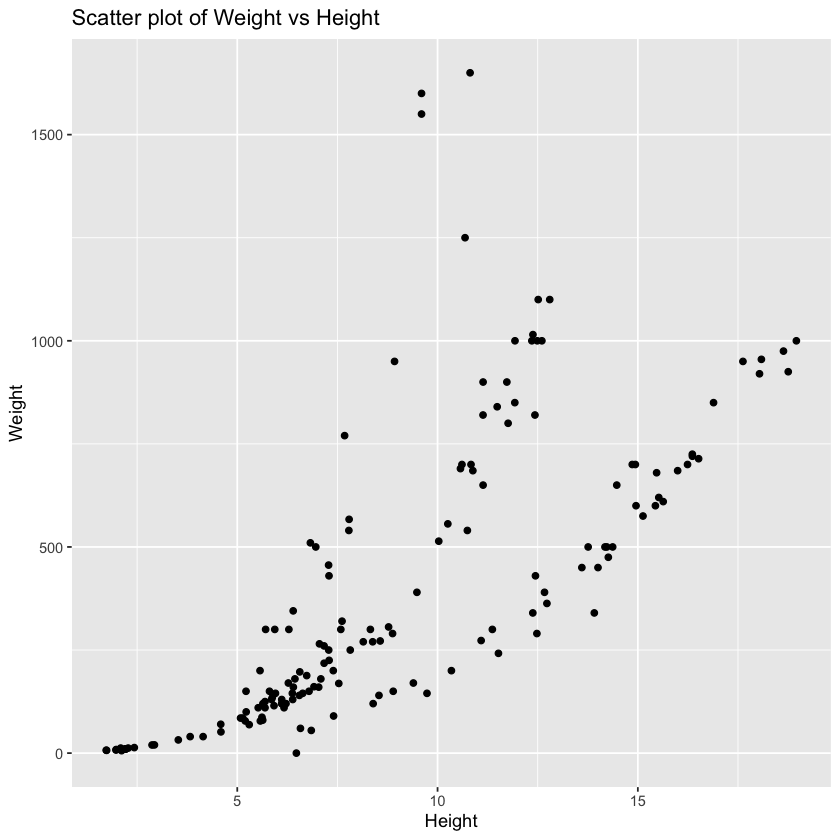

In [26]:
scatter_plot(fishes, names(fishes)[4], "Weight")

The fish's height and weight exhibit a positive association as well, although the scatter points are more dispersed in the height data than in the length data. This implies that, although it might be more variable than length, height plays a significant role in determining the fish's weight as well.

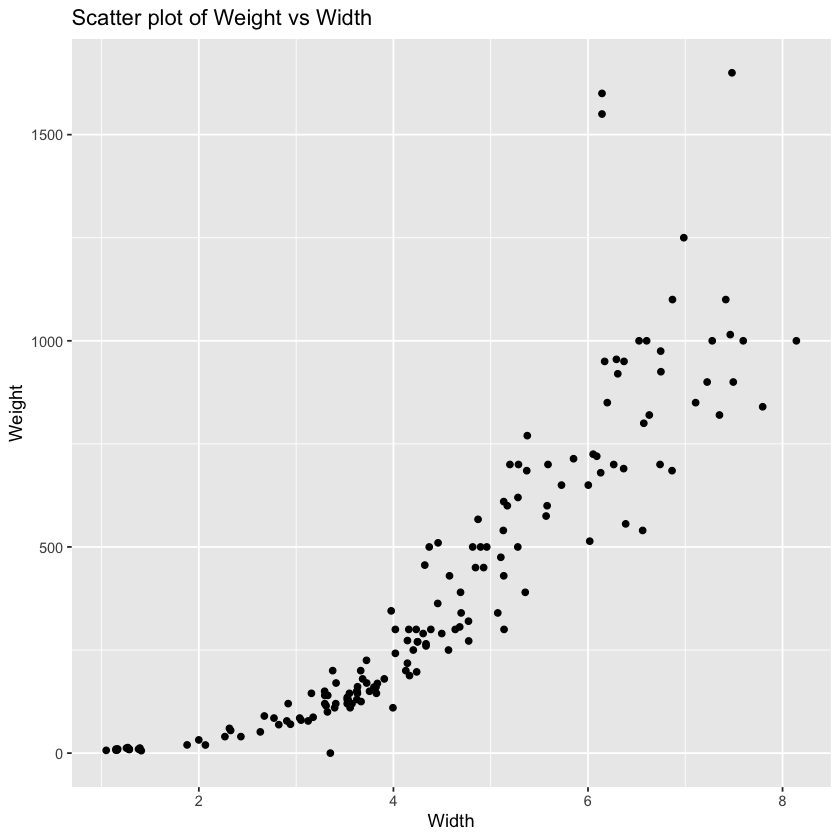

In [27]:
scatter_plot(fishes, names(fishes)[5], "Weight")

We can see that there is a substantial positive correlation between the width and weight. We can see a consistent association between width and weight from the dense cluster formed by the width scatter points.

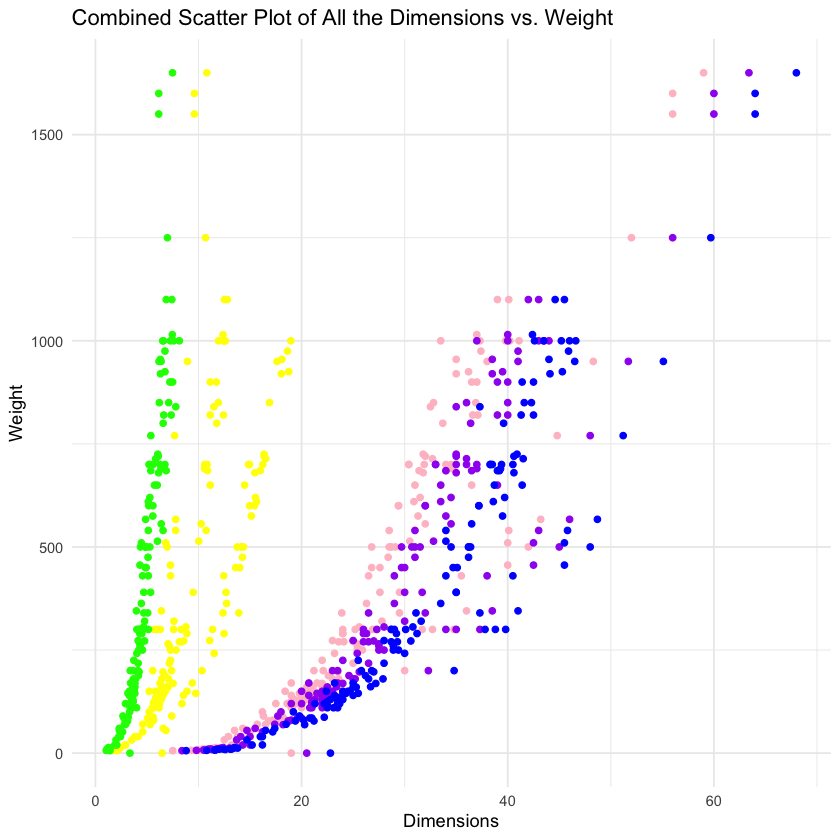

In [28]:
ggplot() +
  geom_point(data = fishes, aes(x = Length1, y = Weight), color = 'pink') +
  geom_point(data = fishes, aes(x = Length2, y = Weight), color = 'purple') +
  geom_point(data = fishes, aes(x = Length3, y = Weight), color = 'blue') +
  geom_point(data = fishes, aes(x = Height, y = Weight), color = 'yellow') +
  geom_point(data = fishes, aes(x = Width, y = Weight), color = 'green') +
  labs(title = "Combined Scatter Plot of All the Dimensions vs. Weight",
       x = "Dimensions",
       y = "Weight") +
  theme_minimal()


All little fish are, as one might think, lighter than large fish. Given that the fish don't grow very wide or long, the abrupt weight gain is reasonable. In summary, a discernible pattern in the data suggests that fish weight grows in tandem with increasing dimensions. This implies that each of the measured measurements has a significant role in determining how much a fish will weigh.

**Part C:** Use your favorite method in R to fit simple linear regression models to the data. Fit a separate SLR model for each feature.


Once you have fit each model, report the following information about each model: 
- intercept value
- slope value
- p-value

In [29]:
set.seed(11) #setting random number generator.
n = floor(0.8 * nrow(fishes)) #the number corresponding to 80% of the data
index = sample(seq_len(nrow(fishes)), size = n) #randomly sampling indices for training set data

train = fishes[index, ] #set the training set to be the randomly sampled rows of the data frame
test = fishes[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.")  #check the dimensions

There are 127 rows and 6 columns in the training set. There are 32 rows and 6 columns in the testing set.

In [30]:
lm_fishes_l1 = lm(Weight ~ Length1, data = train)
summary(lm_fishes_l1)


Call:
lm(formula = Weight ~ Length1, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-427.18  -69.29    0.83   94.65  355.95 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -471.831     35.517  -13.29   <2e-16 ***
Length1       33.310      1.293   25.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 142.9 on 125 degrees of freedom
Multiple R-squared:  0.8415,	Adjusted R-squared:  0.8402 
F-statistic: 663.5 on 1 and 125 DF,  p-value: < 2.2e-16


The intercept value is $-471.831$, the slope is $33.310$, and the p-value is less than $2.2e^{-16}$

In [31]:
lm_fishes_l2 = lm(Weight ~ Length2, data = train)
summary(lm_fishes_l2)


Call:
lm(formula = Weight ~ Length2, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-418.25  -70.00   -7.41   89.35  330.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -482.680     35.176  -13.72   <2e-16 ***
Length2       31.132      1.183   26.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 140.4 on 125 degrees of freedom
Multiple R-squared:  0.847,	Adjusted R-squared:  0.8458 
F-statistic: 692.1 on 1 and 125 DF,  p-value: < 2.2e-16


The intercept value is $-482.680$, the slope is $31.132$, and the p-value is less than $2.2e^{-16}$

In [32]:
lm_fishes_l3 = lm(Weight ~ Length3, data = train)
summary(lm_fishes_l3)


Call:
lm(formula = Weight ~ Length3, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-379.01  -67.34  -25.04   95.43  318.19 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -493.173     34.895  -14.13   <2e-16 ***
Length3       28.587      1.066   26.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.1 on 125 degrees of freedom
Multiple R-squared:  0.8519,	Adjusted R-squared:  0.8507 
F-statistic: 718.8 on 1 and 125 DF,  p-value: < 2.2e-16


The intercept value is $-493.173$, the slope is $28.587$, and the p-value is less than $2.2e^{-16}$

In [33]:
lm_fishes_h = lm(Weight ~ Height, data = train)
summary(lm_fishes_h)


Call:
lm(formula = Weight ~ Height, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-335.30 -108.26  -65.91   30.99 1177.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -140.20      48.83  -2.871   0.0048 ** 
Height         58.62       4.90  11.962   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 245.1 on 125 degrees of freedom
Multiple R-squared:  0.5337,	Adjusted R-squared:   0.53 
F-statistic: 143.1 on 1 and 125 DF,  p-value: < 2.2e-16


The intercept value is $-140.20$, the slope is $58.62$, and the p-value is less than $2.2e^{-16}$

In [34]:
lm_fishes_w = lm(Weight ~ Width, data = train)
summary(lm_fishes_w)


Call:
lm(formula = Weight ~ Width, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-252.44 -105.15  -42.97   79.21  884.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -419.350     42.895  -9.776   <2e-16 ***
Width        184.668      9.208  20.056   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 174.7 on 125 degrees of freedom
Multiple R-squared:  0.7629,	Adjusted R-squared:  0.761 
F-statistic: 402.2 on 1 and 125 DF,  p-value: < 2.2e-16


The intercept value is $-419.350$, the slope is $184.668$, and the p-value is less than $2.2e^{-16}$

**Part D:** Use the SLR model from **Part C** for $\texttt{Length3}$ versus $\texttt{Weight}$ to estimate the weight of a fish whose measurement for $\texttt{Length3}=31$ cm. 

In [35]:
yhat_31 = as.numeric(round(coef(lm_fishes_l3)[1] + coef(lm_fishes_l3)[2]*31, 2))
cat("Estimated Weight at Length3 = 31 cm is", yhat_31,"grams\n")

Estimated Weight at Length3 = 31 cm is 393.03 grams


 The estimated Weight at Length3 = 31 cm is 393.03 grams.

**Part E:** Looking at all 5 SLR models from **Part C**, what do you notice about the p-values? What inferences could you make from this information.

The low p-values of all the predictor variables show that they are all significantly correlated with the response variable 'Weight'. Put otherwise, every single feature plays a major role in predicting 'Weight'. The high level of significance of each predictor variable implies that the model as a whole is doing an excellent job of explaining the response variable's variability. The high $R^2$ values shown in the regression summaries provide evidence for this.

**Part F:(BONUS)** Not required. If you complete this portion, it is worth 3 bonus points towards your score on this assignment. 

Now, let's fit a multiiple linear regression model! 

Explicitly write out the MLR model using the coefficients that you found so that you have an answer of the form:
$$ \hat{y} = \beta_0+\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 $$

In [36]:
mlr_fishes <- lm(Weight ~ Length1 + Length2 + Length3 + Height + Width, data = train)
summary(mlr_fishes)


Call:
lm(formula = Weight ~ Length1 + Length2 + Length3 + Height + 
    Width, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-275.69  -68.84  -21.98   60.38  403.20 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -488.413     33.681 -14.501  < 2e-16 ***
Length1       52.098     45.484   1.145  0.25430    
Length2       19.037     46.883   0.406  0.68542    
Length3      -41.962     19.573  -2.144  0.03405 *  
Height        33.338      9.939   3.354  0.00106 ** 
Width         -1.463     23.271  -0.063  0.94999    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 125.7 on 121 degrees of freedom
Multiple R-squared:  0.8812,	Adjusted R-squared:  0.8763 
F-statistic: 179.5 on 5 and 121 DF,  p-value: < 2.2e-16


$ \hat{y} $ is the weight.
$ \beta_0 $ is the intercept
$\beta_1 + \beta_2 + \beta_3 + \beta_4 + \beta_5 $  are the coefficients for Length1, Length2, Length3, Height, and Width.

Hence the MLR model is 

$$ \hat{y} = \beta_0+\beta_1 Length1 + \beta_2 Length2 + \beta_3 Length3 + \beta_4 Height + \beta_5 Width $$


From the summary output, we can say that $\beta_0 = -488.413, \beta_1 =  52.098, \beta_2 = 19.037, beta_3 = -41.962, \beta_4 = 33.338,$ and $\beta_5 = -1.463$

So to explicitly write out the MLR model using the coefficients that were found,


$$ \hat{y} = -488.413 + 52.098 Length1 + 19.037 Length2 - 41.962 Length3 + 33.338 Height - 1.463 Width $$

$$or$$

$$ \hat{y} = -488.413 + 52.098 x_1 + 19.037 x_2 - 41.962 x_3 + 33.338 x_4 - 1.463 x_5 $$
